# EGR 305/ECON 211 Engineering Systems Optimization and Economy
## Final Project Code
> Code Author: Chenglin Zhang
> 
> NetID: cz155
> 
> Date: 4th Dec., 2022

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# 0-19, 20-59 (20-29, 30-39, 40-49, 50-59), 60-69, 70-79, 80+
# based on the other regions' data

# here is the data for 5 age groups' people's willingness to get vaccinated (one dose, two dose (if applicable), not vaccinated)

willingness_pfizer_first_dose = np.array([0.05, 0.2, 0.08, 0.11, 0.15])
willingness_pfizer_second_dose = np.array([0.8, 0.6, 0.87, 0.8, 0.62])
willingness_pfizer_no_dose = 1 - willingness_pfizer_first_dose - willingness_pfizer_second_dose

# x = np.array([i for i in range(1, len(willingness_pfizer_first_dose) + 1)])
age_group = ['0-19', '20-59', '60-69', '70-79', '80+']

willingness_oxford_first_dose = []
willingness_oxford_second_dose = []

willingness_jenssen_first_dose = []

willingness_sinovac_first_dose = []
willingness_sinovac_second_dose = []

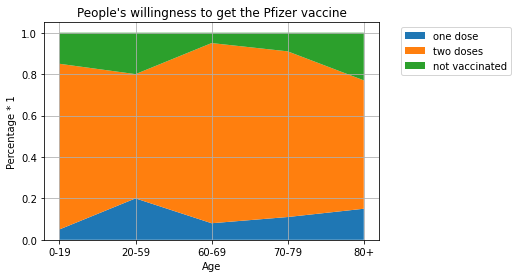

In [25]:
# visualize the willingness to get vaccinated for Pfizer

plt.stackplot(age_group, willingness_pfizer_first_dose, 
              willingness_pfizer_second_dose, 
              willingness_pfizer_no_dose, labels = ['one dose', 'two doses', 'not vaccinated'])
plt.xlabel('Age')
plt.ylabel('Percentage * 1')
plt.title("People's willingness to get the Pfizer vaccine")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.show()

In [6]:
def utility_of_QALY(QALY):
    return np.sqrt(QALY)

population_A = [0.23, 0.57, 0.15, 0.05]

different_outcome_group_20_59 = [0.9999, 0.00009, 0.00001]

pfizer_20_59_transition_2 = [np.random.triangular(0.5, 0.6, 0.7), np.random.triangular(0.9, 0.95, 1), np.random.triangular(0.999, 0.9999, 1)]
pfizer_20_59_transition_1 = [np.random.triangular(0.3, 0.4, 0.5), np.random.triangular(0.6, 0.68, 0.75), np.random.triangular(0.99, 0.995, 1)]

QALY_loss_20_59 = [0.95, 0.8, 0]

# the inputs are 
# 1. willingness_(vaccine brand)_(which dose)
# 2. different_outcome_(age group): the percentage of people will have mild symptoms, be hospitalized, and be dead
# 3. (vaccine brand)_(age group)_transition_(which dose): the percentage of people will go to the less severe case if they were to get vaccinated
# 4. QALY_loss_(age group): the loss in QALY (based on how severe the outcome is)

# the output is
# QALY_(vaccine brand)_(age group)_(region)
# utility_QALY_(vaccine brand)_(age group)_(region)

QALY_pfizer_20_59_A = \
willingness_pfizer_no_dose[1] * (different_outcome_group_20_59[0] * QALY_loss_20_59[0] + 
                                 different_outcome_group_20_59[1] * QALY_loss_20_59[1] + 
                                 different_outcome_group_20_59[2] * QALY_loss_20_59[2]) + \
\
willingness_pfizer_first_dose[1] * (different_outcome_group_20_59[0] * pfizer_20_59_transition_1[0] * 1 + 
                                    different_outcome_group_20_59[0] * (1 - pfizer_20_59_transition_1[0]) * QALY_loss_20_59[0] + 
                                    different_outcome_group_20_59[1] * pfizer_20_59_transition_1[1] * QALY_loss_20_59[0] + 
                                    different_outcome_group_20_59[1] * (1 - pfizer_20_59_transition_1[1]) * QALY_loss_20_59[1] + 
                                    different_outcome_group_20_59[2] * pfizer_20_59_transition_1[2] * QALY_loss_20_59[1] + 
                                    different_outcome_group_20_59[2] * (1 - pfizer_20_59_transition_1[2]) * QALY_loss_20_59[2]) + \
\
willingness_pfizer_second_dose[1] * (different_outcome_group_20_59[0] * pfizer_20_59_transition_2[0] * 1 + 
                                    different_outcome_group_20_59[0] * (1 - pfizer_20_59_transition_2[0]) * QALY_loss_20_59[0] + 
                                    different_outcome_group_20_59[1] * pfizer_20_59_transition_2[1] * QALY_loss_20_59[0] + 
                                    different_outcome_group_20_59[1] * (1 - pfizer_20_59_transition_2[1]) * QALY_loss_20_59[1] + 
                                    different_outcome_group_20_59[2] * pfizer_20_59_transition_2[2] * QALY_loss_20_59[1] + 
                                    different_outcome_group_20_59[2] * (1 - pfizer_20_59_transition_2[2]) * QALY_loss_20_59[2])

utility_QALY_pfizer_20_59_A = utility_of_QALY(QALY_pfizer_20_59_A)       
print(utility_QALY_pfizer_20_59_A)

QALY_no_vaccine_20_59_A = different_outcome_group_20_59[0] * QALY_loss_20_59[0] + \
                          different_outcome_group_20_59[1] * QALY_loss_20_59[1] + \
                          different_outcome_group_20_59[2] * QALY_loss_20_59[2]

utility_QALY_no_vaccine_20_59_A = utility_of_QALY(QALY_no_vaccine_20_59_A)   
print(utility_QALY_no_vaccine_20_59_A)                                               

0.984558690853588
0.9746676356584331


In [9]:
def calculate_expectation(ageGroup_index, willingness_vaccineBrand_whichDose, different_outcome_ageGroup, QALY_loss_ageGroup, vaccineBrand_ageGroup_transition_whichDose):
    if len(willingness_vaccineBrand_whichDose) == 3:
        result = \
        willingness_vaccineBrand_whichDose[0][ageGroup_index] * (different_outcome_ageGroup[0] * QALY_loss_ageGroup[0] + 
                                        different_outcome_ageGroup[1] * QALY_loss_ageGroup[1] + 
                                        different_outcome_ageGroup[2] * QALY_loss_ageGroup[2]) + \
        \
        willingness_vaccineBrand_whichDose[1][ageGroup_index] * (different_outcome_ageGroup[0] * vaccineBrand_ageGroup_transition_whichDose[0][0] * 1 + 
                                            different_outcome_ageGroup[0] * (1 - vaccineBrand_ageGroup_transition_whichDose[0][0]) * QALY_loss_ageGroup[0] + 
                                            different_outcome_ageGroup[1] * vaccineBrand_ageGroup_transition_whichDose[0][1] * QALY_loss_ageGroup[0] + 
                                            different_outcome_ageGroup[1] * (1 - vaccineBrand_ageGroup_transition_whichDose[0][1]) * QALY_loss_ageGroup[1] + 
                                            different_outcome_ageGroup[2] * vaccineBrand_ageGroup_transition_whichDose[0][2] * QALY_loss_ageGroup[1] + 
                                            different_outcome_ageGroup[2] * (1 - vaccineBrand_ageGroup_transition_whichDose[0][2]) * QALY_loss_ageGroup[2]) + \
        \
        willingness_vaccineBrand_whichDose[2][ageGroup_index] * (different_outcome_ageGroup[0] * vaccineBrand_ageGroup_transition_whichDose[1][0] * 1 + 
                                            different_outcome_ageGroup[0] * (1 - vaccineBrand_ageGroup_transition_whichDose[1][0]) * QALY_loss_ageGroup[0] + 
                                            different_outcome_ageGroup[1] * vaccineBrand_ageGroup_transition_whichDose[1][1] * QALY_loss_ageGroup[0] + 
                                            different_outcome_ageGroup[1] * (1 - vaccineBrand_ageGroup_transition_whichDose[1][1]) * QALY_loss_ageGroup[1] + 
                                            different_outcome_ageGroup[2] * vaccineBrand_ageGroup_transition_whichDose[1][2] * QALY_loss_ageGroup[1] + 
                                            different_outcome_ageGroup[2] * (1 - vaccineBrand_ageGroup_transition_whichDose[1][2]) * QALY_loss_ageGroup[2])
    else:
        result = \
        willingness_vaccineBrand_whichDose[0][ageGroup_index] * (different_outcome_ageGroup[0] * QALY_loss_ageGroup[0] + 
                                        different_outcome_ageGroup[1] * QALY_loss_ageGroup[1] + 
                                        different_outcome_ageGroup[2] * QALY_loss_ageGroup[2]) + \
        \
        willingness_vaccineBrand_whichDose[1][ageGroup_index] * (different_outcome_ageGroup[0] * vaccineBrand_ageGroup_transition_whichDose[0][0] * 1 + 
                                            different_outcome_ageGroup[0] * (1 - vaccineBrand_ageGroup_transition_whichDose[0][0]) * QALY_loss_ageGroup[0] + 
                                            different_outcome_ageGroup[1] * vaccineBrand_ageGroup_transition_whichDose[0][1] * QALY_loss_ageGroup[0] + 
                                            different_outcome_ageGroup[1] * (1 - vaccineBrand_ageGroup_transition_whichDose[0][1]) * QALY_loss_ageGroup[1] + 
                                            different_outcome_ageGroup[2] * vaccineBrand_ageGroup_transition_whichDose[0][2] * QALY_loss_ageGroup[1] + 
                                            different_outcome_ageGroup[2] * (1 - vaccineBrand_ageGroup_transition_whichDose[0][2]) * QALY_loss_ageGroup[2])
    if_not_vaccinated = different_outcome_ageGroup[0] * QALY_loss_ageGroup[0] + \
                        different_outcome_ageGroup[1] * QALY_loss_ageGroup[1] + \
                        different_outcome_ageGroup[2] * QALY_loss_ageGroup[2]
    return utility_of_QALY(result), utility_of_QALY(if_not_vaccinated)

In [12]:
# Pfizer 20-59
from tqdm import tqdm

willingness_first_dose = np.array([0.05, 0.2, 0.08, 0.11, 0.15])
willingness_second_dose = np.array([0.8, 0.6, 0.87, 0.8, 0.62])
willingness_no_dose = 1 - willingness_first_dose - willingness_second_dose

willingness_vaccineBrand_whichDose = [willingness_no_dose, willingness_first_dose, willingness_second_dose]
different_outcome_ageGroup = [0.9999, 0.00009, 0.00001]
QALY_loss_ageGroup = [0.95, 0.8, 0]

MC = 10000
pfizer_20_59 = []

for i in tqdm(range(0, MC)):
    vaccineBrand_ageGroup_transition_whichDose = [[np.random.triangular(0.3, 0.4, 0.5), np.random.triangular(0.6, 0.68, 0.75), np.random.triangular(0.99, 0.995, 1)], 
                                                [np.random.triangular(0.5, 0.6, 0.7), np.random.triangular(0.9, 0.95, 1), np.random.triangular(0.999, 0.9999, 1)]]

    this_pfizer_20_59, this_non_20_59 = calculate_expectation(1, willingness_vaccineBrand_whichDose, different_outcome_ageGroup, QALY_loss_ageGroup, vaccineBrand_ageGroup_transition_whichDose)
    pfizer_20_59.append(this_pfizer_20_59)


100%|██████████| 10000/10000 [00:00<00:00, 93966.42it/s]


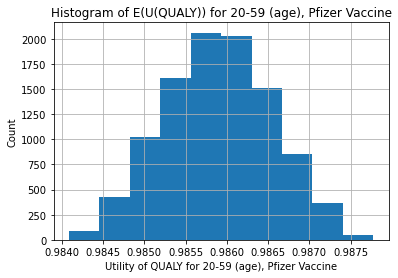

In [17]:
plt.hist(pfizer_20_59)
plt.xlabel('Utility of QUALY for 20-59 (age), Pfizer Vaccine')
plt.ylabel('Count')
plt.title('Histogram of E(U(QUALY)) for 20-59 (age), Pfizer Vaccine')
plt.grid()
plt.show()